In [1]:
import os
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr
import re

In [2]:
msa_regions_pdbs = pd.read_csv('../datasets/msa_regions_pdbs.tsv', sep = '\t')
kinases = pd.read_csv('../datasets/kinases.tsv', sep= '\t')
regions = pd.read_csv('../datasets/regions.txt', sep = "\t")

In [4]:
kinases.Uniprot.nunique()

280

In [3]:
organisms = pd.read_csv('../raw_data/uniprot-280-kinases-organisms.tsv.gz', compression= 'gzip', sep= '\t')
organisms.columns = organisms.columns.str.lower().str.replace(" ", "_")
organisms.organism = organisms.organism.apply(lambda x: re.findall('^([\w\s]+)', x)[0].strip())
organisms

,from,entry,entry_name,protein_names,gene_names,organism,organism_(id)
0,A0A2I0BVG8,A0A2I0BVG8,CDPK1_PLAFO,Calcium-dependent protein kinase 1 (EC 2.7.11....,PDCK1 CK202_3261,Plasmodium falciparum,5843
1,A0A509AFG4,A0A509AFG4,CDPK3_PLABA,Calcium-dependent protein kinase 3 (EC 2.7.11....,CDPK3 PBANKA_0408200,Plasmodium berghei,5823
2,A0A509AHB6,A0A509AHB6,CDPK1_PLABA,Calcium-dependent protein kinase 1 (EC 2.7.11....,CDPK1 PBANKA_0314200,Plasmodium berghei,5823
3,A0A509AKL0,A0A509AKL0,KGP_PLABA,cGMP-dependent protein kinase (EC 2.7.11.12) (...,PKG PBANKA_1008200,Plasmodium berghei,5823
4,A0A509AQE6,A0A509AQE6,CDPK5_PLABA,Calcium-dependent protein kinase 5 (EC 2.7.11....,CDPK5 PBANKA_1351500,Plasmodium berghei,5823
...,...,...,...,...,...,...,...
275,Q9ZSA4,Q9ZSA4,CDPKR_ARATH,Calcium-dependent protein kinase 27 (EC 2.7.11.1),CPK27 At4g04700 T19J18.12 T4B21.11,Arabidopsis thaliana,3702
276,Q9ZUZ2,Q9ZUZ2,CAMK3_ARATH,CDPK-related kinase 3 (AtCRK3) (EC 2.7.11.1) (...,CRK3 CaMK4 CK At2g46700 T3A4.8,Arabidopsis thaliana,3702
277,Q9ZV15,Q9ZV15,CDPKK_ARATH,Calcium-dependent protein kinase 20 (EC 2.7.11.1),CPK20 At2g38910 T7F6.8,Arabidopsis thaliana,3702
278,W0LYS5,W0LYS5,CAMKI_MACNP,Calcium/calmodulin-dependent protein kinase ty...,CaMKI,Macrobrachium nipponense,159736


In [4]:
organisms.organism.nunique()

34

In [5]:
# Take the first 9 most frequent, the rest group in "others"
species_freq = organisms.organism.value_counts()
species_freq = species_freq.to_frame().reset_index().rename(columns= {'index': 'organism', 'organism': 'count'})
species_freq

,organism,count
0,Homo sapiens,88
1,Arabidopsis thaliana,42
2,Oryza sativa subsp,29
3,Mus musculus,29
4,Rattus norvegicus,17
5,Plasmodium falciparum,10
6,Bos taurus,7
7,Plasmodium berghei,5
8,Oryctolagus cuniculus,5
9,Xenopus laevis,4


In [6]:
c= 0
indexes_to_drop = []
for i in species_freq.index:
    #print(i)
    v= species_freq.iloc[i]['count']
    if v < 4:
        c += v
        indexes_to_drop.append(i)
species_freq.drop(species_freq.index[indexes_to_drop], inplace=True)
species_freq.loc[len(species_freq.index)] = ["others", c]
species_freq

,organism,count
0,Homo sapiens,88
1,Arabidopsis thaliana,42
2,Oryza sativa subsp,29
3,Mus musculus,29
4,Rattus norvegicus,17
5,Plasmodium falciparum,10
6,Bos taurus,7
7,Plasmodium berghei,5
8,Oryctolagus cuniculus,5
9,Xenopus laevis,4


In [7]:
[ 0.05 for i in range(species_freq.shape[0]) ]

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

In [ ]:
["#ffadad","#ffd6a5","#fdffb6","#caffbf","#9bf6ff","#a0c4ff","#bdb2ff","#ffc6ff","#fffffc"]

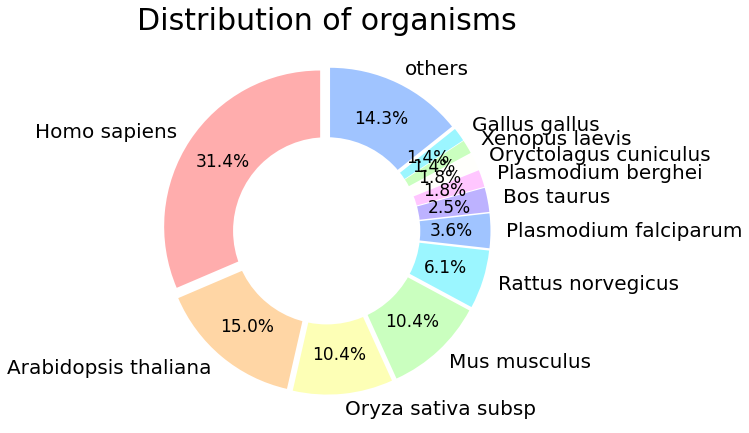

In [11]:
# Pie chart
labels = species_freq.organism.to_list()
sizes = species_freq["count"].to_list()
#colors
#colors = ["#ff595e","#ff924c","#ffca3a","#c5ca30","#8ac926","#36949d","#1982c4","#4267ac", "#ff595e","#ff924c","#565aa0","#6a4c93"]
colors = ["#ffadad","#ffd6a5","#fdffb6","#caffbf","#9bf6ff","#a0c4ff","#bdb2ff","#ffc6ff","#fffffc", "#caffbf","#9bf6ff","#a0c4ff"]
#explsion
explode = [ 0.05 for i in range(species_freq.shape[0]) ]

plt.rcParams['font.size'] = 17

fig = plt.figure(figsize=(10, 10))
ax = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode = explode)
# Set the font size for x tick labels
plt.rc('xtick', labelsize= 20)

#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax.axis('equal')  

plt.title("Distribution of organisms", fontsize= 30)

plt.tight_layout()
plt.show()

## Distribution of CREs lengths

In [4]:
cres = regions[regions.term_id.str.startswith("cre")]
cres["length"] = cres.end - cres.start + 1
cres

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,uniprot_acc,start,end,term_id,length
286,A0A2I0BVG8,346,353,cre1,8
287,A0A509AFG4,385,393,cre2,9
288,A0A509AHB6,345,352,cre3,8
289,A0A509AKL0,1,33,cre4,33
290,A0A509AQE6,394,402,cre5,9
...,...,...,...,...,...
567,Q9ZSA4,295,325,cre282,31
568,Q9ZUZ2,409,439,cre283,31
569,Q9ZV15,398,428,cre284,31
570,W0LYS5,287,327,cre285,41


In [6]:
cres.length.mean()

63.01048951048951

In [7]:
cres.length.median()

31.0

In [8]:
cres.length.describe()

count    286.000000
mean      63.010490
std       82.896066
min        6.000000
25%       26.000000
50%       31.000000
75%       71.000000
max      648.000000
Name: length, dtype: float64

<AxesSubplot:>

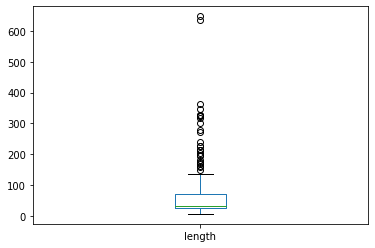

In [5]:
cres.length.plot(kind= 'box')

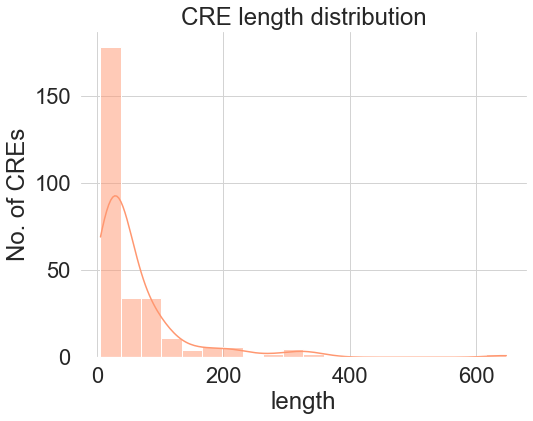

In [78]:
#plt.figure(figsize= (8,8))
sns.set(rc={'figure.figsize':(8, 6), 'axes.facecolor':'white','grid.color':'lightgray', 'grid.linewidth':1}, font_scale= 2)
color = ['#ff9770']
sns.histplot(cres.length,  kde= True, color= color, bins= 20)
plt.ylabel("No. of CREs")
plt.title("CRE length distribution")
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


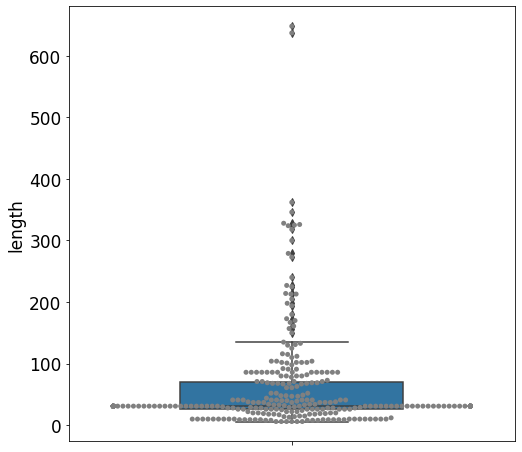

In [26]:
plt.figure(figsize= (8,8))
# Usual boxplot
ax = sns.boxplot(y=cres.length, width= 0.5)
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(y= cres.length, color="grey")
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


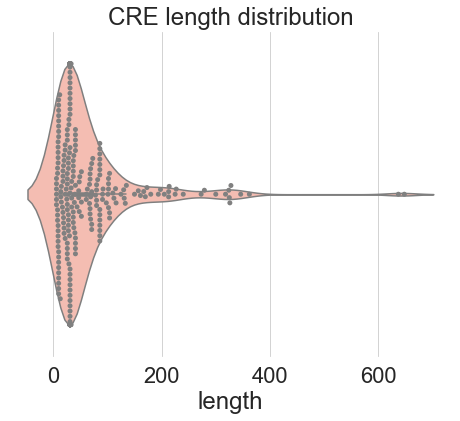

In [57]:
sns.set(rc={'figure.figsize':(8, 6), 'axes.facecolor':'white','grid.color':'lightgray', 'grid.linewidth':1}, font_scale= 2)
color = ['#ffb5a7']
# Usual boxplot
ax = sns.violinplot(x=cres.length, width= 0.8, palette= color)
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(x= cres.length, color="grey")
plt.title("CRE length distribution")
plt.show()

In [56]:
len(regions[regions.term_id.str.startswith("cre")].uniprot_acc.unique())

280

<Figure size 576x720 with 0 Axes>

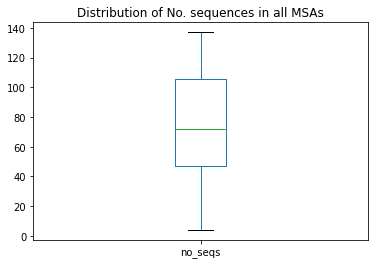

In [3]:
plt.figure(figsize= (8,10))
msa_regions_pdbs[['msa', 'no_seqs']].drop_duplicates().sort_values("no_seqs").plot(kind= 'box') # algunos devberian tener mas seqs
plt.title("Distribution of No. sequences in all MSAs")
plt.show()

msa_regions_pdb has only the uniprots from the kinases dataset. Orthologs uniprot should be added

In [5]:
regions[regions.term_id.str.startswith("cre")].term_id.nunique()

286

In [74]:
# Path to MSA files (60% identity; gap stripped)
path = '../homology_transfer/pipeline_MSA_uniprot/data_snake/09_align_selection_gstrip/'
d = {}
for filename in os.listdir(path):

    # Get reference uniprot
    reference = filename.split("_")[0] +"_60"
    # List of uniprot in this MSA
    uniprot_list = []
    
    for seq_record in SeqIO.parse(path + filename, 'fasta'):
        # print(seq_record.id)
        # print(repr(seq_record.seq))
        # print(len(seq_record))

        uniprot = seq_record.id
        # Add uniprots to the list
        uniprot_list.append(uniprot)
        
    # The first uniprot accession is the reference sequence
    d[reference] = uniprot_list

# Convert the dictionary to a dataframe
msa_orthologs = pd.DataFrame([(k, x) for k, v in d.items() for x in v], columns=['msa', 'uniprot'])
msa_orthologs

,msa,uniprot
0,A0A2I0BVG8_60,A0A2I0BVG8
1,A0A2I0BVG8_60,A0A0D9QJY8
2,A0A2I0BVG8_60,A0A0L7M8D5
3,A0A2I0BVG8_60,A0A1Y3DU95
4,A0A2I0BVG8_60,A5KBU9
...,...,...
12355,W7JX98_60,W7JX98
12356,W7JX98_60,A0A0D9QPF1
12357,W7JX98_60,A0A0L7M3I6
12358,W7JX98_60,Q7PDS2


In [5]:
msa_orthologs.uniprot.nunique()

8411

In [75]:
proteins_list = msa_orthologs.uniprot.unique().tolist()

In [91]:
# with open('../datasets/all_orthologs_list.txt', 'w') as f:
#     for uniprot in proteins_list:
#         f.write("%s\n" % uniprot)

In [76]:
msa_seqs_distribution =  msa_orthologs.msa.value_counts().to_frame()
msa_seqs_distribution

,msa
Q00771_60,273
O43318_60,137
Q8BRK8_60,137
Q09137_60,136
Q13188_60,129
...,...
Q8ICR0_60,3
Q9ZSA3_60,3
Q1PFH8_60,3
Q42438_60,2


No handles with labels found to put in legend.


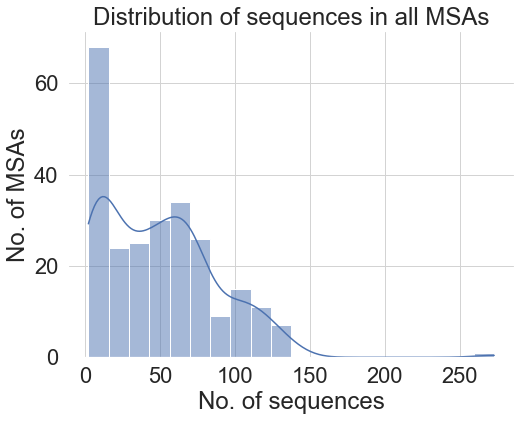

In [77]:
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(8, 6), 'axes.facecolor':'white','grid.color':'lightgray', 'grid.linewidth':1}, font_scale= 2)
#sns.set(rc={'figure.figsize':(10,15)})
#fig.set_size_inches(11.7, 8.27)
sns.histplot(msa_seqs_distribution, kde= True, bins= 20, ax= ax)

plt.xlabel("No. of sequences")
plt.ylabel("No. of MSAs")
plt.title("Distribution of sequences in all MSAs")
plt.legend().remove()
plt.show()

In [6]:
all_msas = pd.read_csv('../datasets/all_msas.tsv', sep= '\t')
all_msas = all_msas[all_msas.msa.str.endswith("60")]
all_msas

,msa,uniprot,length_msa
0,A0A2I0BVG8_60,A0A2I0BVG8,536
1,A0A2I0BVG8_60,A0A0D9QJY8,536
2,A0A2I0BVG8_60,A0A0L7M8D5,536
3,A0A2I0BVG8_60,A0A1Y3DU95,536
4,A0A2I0BVG8_60,A5KBU9,536
...,...,...,...
42077,W7JX98_60,W7JX98,873
42078,W7JX98_60,A0A0D9QPF1,873
42079,W7JX98_60,A0A0L7M3I6,873
42080,W7JX98_60,Q7PDS2,873


In [7]:
all_msas.uniprot.nunique()

8411

In [8]:
region_to_transfer = pd.read_csv('../homology_transfer/pipeline_MSA_uniprot/data_snake/12_region_to_transfer.txt', sep= ' ')
region_to_transfer_60 = region_to_transfer[(region_to_transfer.full_identity == '60') & (region_to_transfer.region_identity == '60')]
region_to_transfer_60

,ref_uniprot_acc,ref_start,ref_end,method,full_identity,region_identity,quality_full,quality_region,uniprot_acc,start,end,term_id
26,A0A2I0BVG8,56,325,clustalO,60,60,1.0,1.0,A0A0L7M8D5,56,305,kd1
32,A0A2I0BVG8,56,325,clustalO,60,60,1.0,1.0,W4J6J2,56,325,kd1
38,A0A2I0BVG8,56,325,clustalO,60,60,1.0,1.0,A5KBU9,56,327,kd1
50,A0A2I0BVG8,56,325,clustalO,60,60,1.0,1.0,A0A0D9QJY8,58,329,kd1
60,A0A2I0BVG8,56,325,clustalO,60,60,1.0,1.0,A0A1Y3DU95,66,337,kd1
...,...,...,...,...,...,...,...,...,...,...,...,...
182121,W7JX98,1,29,clustalO,60,60,1.0,1.0,W4IVK0,1,29,cre286
182183,W7JX98,541,798,clustalO,60,60,1.0,1.0,Q7PDS2,471,728,kd286
182199,W7JX98,541,798,clustalO,60,60,1.0,1.0,W4IVK0,541,798,kd286
182200,W7JX98,541,798,clustalO,60,60,1.0,1.0,A0A0D9QPF1,541,798,kd286


In [12]:
region_to_transfer_60.uniprot_acc.nunique() + region_to_transfer_60.ref_uniprot_acc.nunique()

8474

In [16]:
len(set(region_to_transfer_60.uniprot_acc).union(set(region_to_transfer_60.ref_uniprot_acc)))

8410

In [10]:
msa_regions_pdbs.term_id_cre.nunique()

51

In [43]:
to_merge = msa_regions_pdbs[['msa', 'uniprot','term_id_cre', 'start_cre', 'end_cre', 'length_cre', 'term_id_kd', 'start_kd', 'end_kd', 'length_kd']].drop_duplicates()
to_merge

,msa,uniprot,term_id_cre,start_cre,end_cre,length_cre,term_id_kd,start_kd,end_kd,length_kd
0,A5K0N4_60,A5K0N4,cre10,1,22,22,kd10,534,791,258
6,A5K0N4_60,Q8I719,cre223,1,29,29,kd223,541,798,258
7,O74536_60,O74536,cre21,305,351,47,kd21,34,285,252
8,O75582_60,O75582,cre22,702,723,22,kd23,426,687,262
15,O77676_60,Q13976,cre134,50,75,26,kd132,360,619,260
...,...,...,...,...,...,...,...,...,...,...
928,Q91VB2_60,Q96NX5,cre243,277,317,41,kd243,23,277,255
929,Q91YS8_60,Q14012,cre135,276,316,41,kd133,20,276,257
933,Q91YS8_60,Q63450,cre183,285,312,28,kd183,20,276,257
934,Q96NX5_60,Q96NX5,cre243,277,317,41,kd243,23,277,255


In [81]:
# SIFT dataset. Remember, this dataset merge all "segments observed" in one line per pdb
pdb_uniprot_mapping = pd.read_csv("../datasets/pdb_uniprot_mapping.tsv", sep= '\t')

In [51]:
pdb_uniprot_mapping[pdb_uniprot_mapping.uniprot.isin(df.uniprot)]

,uniprot,pdb,chain,res_beg,res_end,pdb_beg,pdb_end,sp_beg,sp_end
38276,A5K0N4,4rz7,A,2,816,1,815,1,815
38277,A5K0N4,5dyl,A,2,817,1,816,1,816
38278,A5K0N4,5dzc,A,2,844,1,844,1,843
38279,A5K0N4,5ezr,A,2,815,2,815,2,815
38280,A5K0N4,5f0a,A,2,847,1,846,1,846
...,...,...,...,...,...,...,...,...,...
623748,Q9Y243,2x18,D,5,119,4,118,4,118
623749,Q9Y243,2x18,E,4,119,3,118,3,118
623750,Q9Y243,2x18,F,4,114,3,113,3,113
623751,Q9Y243,2x18,G,5,119,4,118,4,118


In [50]:
pdb_uniprot_mapping[pdb_uniprot_mapping.uniprot.isin(df.uniprot)].pdb.nunique()

2134

In [89]:
pdbs = pdb_uniprot_mapping[pdb_uniprot_mapping.uniprot.isin(proteins_list)]
pdbs

,uniprot,pdb,chain,res_beg,res_end,pdb_beg,pdb_end,sp_beg,sp_end
38276,A5K0N4,4rz7,A,2,816,1,815,1,815
38277,A5K0N4,5dyl,A,2,817,1,816,1,816
38278,A5K0N4,5dzc,A,2,844,1,844,1,843
38279,A5K0N4,5ezr,A,2,815,2,815,2,815
38280,A5K0N4,5f0a,A,2,847,1,846,1,846
...,...,...,...,...,...,...,...,...,...
623748,Q9Y243,2x18,D,5,119,4,118,4,118
623749,Q9Y243,2x18,E,4,119,3,118,3,118
623750,Q9Y243,2x18,F,4,114,3,113,3,113
623751,Q9Y243,2x18,G,5,119,4,118,4,118


In [92]:
pdbs.uniprot.nunique()

116

In [86]:
pdbs.pdb.nunique()

2134

## Now check weather these PDBs cover at least one residue of CRE and KD

In [95]:
pdbs

,uniprot,pdb,chain,res_beg,res_end,pdb_beg,pdb_end,sp_beg,sp_end
38276,A5K0N4,4rz7,A,2,816,1,815,1,815
38277,A5K0N4,5dyl,A,2,817,1,816,1,816
38278,A5K0N4,5dzc,A,2,844,1,844,1,843
38279,A5K0N4,5ezr,A,2,815,2,815,2,815
38280,A5K0N4,5f0a,A,2,847,1,846,1,846
...,...,...,...,...,...,...,...,...,...
623748,Q9Y243,2x18,D,5,119,4,118,4,118
623749,Q9Y243,2x18,E,4,119,3,118,3,118
623750,Q9Y243,2x18,F,4,114,3,113,3,113
623751,Q9Y243,2x18,G,5,119,4,118,4,118


In [125]:
# dataset with KD and CRE region coordinates
kd = pd.read_csv('../datasets/kd.tsv', sep= '\t')
cre = pd.read_csv('../datasets/cre.tsv', sep= '\t')
regions = kd.merge(cre, on= 'uniprot_acc', suffixes= ["_kd", "_cre"])

In [126]:
# This is already done
# # Here, different that script map_pdb_orthologs, I'm including the chain
# sift_ = pdbs[['uniprot', 'chain', 'pdb','sp_beg', 'sp_end']].drop_duplicates()
# sift_ = sift_.sort_values("uniprot")
# sift_

In [127]:
# This is already done
# # Create a unique range for each PDB (instead of splited by segments)
# # Get the min value of coordinates for each pdb
# pdb_min = sift_.groupby(['uniprot', 'pdb']).min().reset_index().drop(columns= 'sp_end')
# # Get the max value of coordinates for each pdb
# pdb_max = sift_.groupby(['uniprot', 'pdb']).max().reset_index().drop(columns= 'sp_beg')
# pdb_coord = pdb_min.merge(pdb_max) # ok!!

In [128]:
pdb_coord = pdbs[['uniprot', 'chain', 'pdb','sp_beg', 'sp_end']] #  

In [129]:
# Convert regions dfs to pyranges object
kd["length"] = kd.end - kd.start + 1
kd.rename(columns= {'uniprot_acc': 'Chromosome'}, inplace= True)
kd.columns = kd.columns.str.capitalize()
# As pyranges object
kd = pr.PyRanges(kd)

cre["length"] = cre.end - cre.start + 1
cre.rename(columns= {'uniprot_acc': 'Chromosome'}, inplace= True)
cre.columns = cre.columns.str.capitalize()
# As pyranges object
cre = pr.PyRanges(cre)

# PDBs coordinates as pyranges object
pdb_pr = pr.PyRanges(pdb_coord.rename(
    columns= {
        'uniprot': 'Chromosome',
        'sp_beg': 'Start',
        'sp_end': 'End'
    }
)
)

In [130]:
# Join
cre = cre.join(pdb_pr, slack= 1, suffix= "_pdb", report_overlap= True) # slack= 1 includes sequence edges)
cre = cre.as_df()
cre.columns = cre.columns.str.lower()
cre.rename(columns= {'chromosome': 'uniprot'}, inplace= True)

kd = kd.join(pdb_pr, slack= 1, suffix= "_pdb", report_overlap= True) # slack= 1 includes sequence edges)
kd = kd.as_df()
kd.columns = kd.columns.str.lower()
kd.rename(columns= {'chromosome': 'uniprot'}, inplace= True)

del(pdb_pr)

In [131]:
# Format columns
cre = cre.rename(
    columns= {
        'start': 'start_cre',
        'end': 'end_cre',
        'term_id': 'term_id_cre',
        'length': 'length_cre',
        'overlap': 'overlap_cre'
    }
)
kd = kd.rename(
    columns= {
        'start': 'start_kd',
        'end': 'end_kd',
        'term_id': 'term_id_kd',
        'length': 'length_kd',
        'overlap': 'overlap_kd'
    }
)

In [132]:
pdb_both_regions = cre.merge(kd)
pdb_both_regions

,uniprot,start_cre,end_cre,term_id_cre,length_cre,chain,pdb,start_pdb,end_pdb,overlap_cre,start_kd,end_kd,term_id_kd,length_kd,overlap_kd
0,A5K0N4,1,22,cre10,22,A,5f0a,1,846,22,534,791,kd10,258,259
1,A5K0N4,1,22,cre10,22,A,5dzc,1,843,22,534,791,kd10,258,259
2,A5K0N4,1,22,cre10,22,A,5dyl,1,816,22,534,791,kd10,258,259
3,A5K0N4,1,22,cre10,22,A,4rz7,1,815,22,534,791,kd10,258,259
4,A5K0N4,1,22,cre10,22,A,5fet,2,816,21,534,791,kd10,258,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,Q16644,344,382,cre142,39,A,3she,33,348,5,44,304,kd142,261,262
1326,Q16644,344,382,cre142,39,A,3r1n,33,348,5,44,304,kd142,261,262
1327,Q61846,326,643,cre178,318,A,4cqg,2,326,1,11,263,kd178,253,254
1328,Q61846,326,643,cre178,318,A,4bfm,2,326,1,11,263,kd178,253,254


In [133]:
pdb_both_regions.nunique()

uniprot         48
start_cre       37
end_cre         43
term_id_cre     50
length_cre      35
chain           14
pdb            825
start_pdb      155
end_pdb        193
overlap_cre     57
start_kd        37
end_kd          39
term_id_kd      48
length_kd       21
overlap_kd      33
dtype: int64

In [139]:
# Random tests
samples = pdbs.sample(5)
samples

,uniprot,pdb,chain,res_beg,res_end,pdb_beg,pdb_end,sp_beg,sp_end
132647,P00519,2g1t,A,7,277,232,502,232,502
133391,P00533,6tfu,A,11,293,700,982,700,982
132652,P00519,2g2f,B,9,277,234,502,234,502
132691,P00519,3qri,B,10,276,232,498,232,498
329479,P35968,3kvq,A,11,100,667,756,667,756


In [142]:
pdbs[pdbs.pdb.isin(samples.pdb)]

,uniprot,pdb,chain,res_beg,res_end,pdb_beg,pdb_end,sp_beg,sp_end
132647,P00519,2g1t,A,7,277,232,502,232,502
132648,P00519,2g1t,B,5,277,230,502,230,502
132649,P00519,2g1t,C,7,282,232,507,232,507
132650,P00519,2g1t,D,4,277,229,502,229,502
132651,P00519,2g2f,A,7,281,232,506,232,506
132652,P00519,2g2f,B,9,277,234,502,234,502
132690,P00519,3qri,A,7,276,229,498,229,498
132691,P00519,3qri,B,10,276,232,498,232,498
133391,P00533,6tfu,A,11,293,700,982,700,982
133392,P00533,6tfu,B,11,295,700,984,700,984


In [140]:
pdb_both_regions[pdb_both_regions.pdb.isin(samples.pdb)]

,uniprot,start_cre,end_cre,term_id_cre,length_cre,chain,pdb,start_pdb,end_pdb,overlap_cre,start_kd,end_kd,term_id_kd,length_kd,overlap_kd
33,P00519,61,233,cre36,173,D,2g1t,229,502,5,242,493,kd37,252,253
39,P00519,61,233,cre36,173,A,3qri,229,498,5,242,493,kd37,252,253
42,P00519,61,233,cre36,173,B,2g1t,230,502,4,242,493,kd37,252,253
46,P00519,61,233,cre36,173,C,2g1t,232,507,2,242,493,kd37,252,253
47,P00519,61,233,cre36,173,A,2g2f,232,506,2,242,493,kd37,252,253
48,P00519,61,233,cre36,173,A,2g1t,232,502,2,242,493,kd37,252,253
59,P00519,61,233,cre36,173,B,3qri,232,498,2,242,493,kd37,252,253
483,P00533,965,998,cre39,34,B,6tfu,700,984,20,712,979,kd39,268,269
488,P00533,965,998,cre39,34,A,6tfu,700,982,18,712,979,kd39,268,269


## Plot organisms

In [20]:
uniprot_organism = pd.read_csv('../raw_data/uniprot-compressed_true_download_true_fields_accession_2Cid_2Creview-2023.06.13-15.17.39.88.tsv.gz', compression= 'gzip', sep= '\t')
uniprot_organism.columns = uniprot_organism.columns.str.lower()
uniprot_organism.columns = uniprot_organism.columns.str.replace(" ", "_")
uniprot_organism.drop(columns='from', inplace= True)
uniprot_organism.rename(columns= {'entry': 'uniprot'}, inplace= True)
uniprot_organism

,uniprot,entry_name,reviewed,protein_names,organism,organism_(id),length
0,A0A2I0BVG8,CDPK1_PLAFO,reviewed,Calcium-dependent protein kinase 1 (EC 2.7.11....,Plasmodium falciparum (isolate NF54),5843,524
1,A0A0D9QJY8,A0A0D9QJY8_PLAFR,unreviewed,CAMK/CDPK protein kinase,Plasmodium fragile,5857,528
2,A0A0L7M8D5,A0A0L7M8D5_PLAF4,unreviewed,Calcium-dependent protein kinase 1,Plasmodium falciparum (isolate Dd2),57267,434
3,A0A1Y3DU95,A0A1Y3DU95_PLAKN,unreviewed,Putative Calcium-dependent protein kinase 1,Plasmodium knowlesi,5850,536
4,A5KBU9,A5KBU9_PLAVS,unreviewed,"Calcium-dependent protein kinase 1, putative",Plasmodium vivax (strain Salvador I),126793,526
...,...,...,...,...,...,...,...
8294,I1L9Q2,I1L9Q2_SOYBN,unreviewed,Uncharacterized protein,Glycine max (Soybean) (Glycine hispida),3847,595
8295,M1AAW2,M1AAW2_SOLTU,unreviewed,Calcium dependent protein kinase 2,Solanum tuberosum (Potato),4113,544
8296,M4C7C7,M4C7C7_BRARP,unreviewed,Calcium-dependent protein kinase 20,Brassica rapa subsp. pekinensis (Chinese cabba...,51351,566
8297,V7BII1,V7BII1_PHAVU,unreviewed,Calcium-dependent protein kinase 20,Phaseolus vulgaris (Kidney bean) (French bean),3885,582


In [22]:
uniprot_organism.organism.nunique()

664

In [23]:
import re

In [27]:
s="Plasmodium falciparum (isolate NF54)"

In [30]:
re.findall('^([\w\s]+)', s)[0].strip()

'Plasmodium falciparum'

In [32]:
uniprot_organism.organism = uniprot_organism.organism.apply(lambda x: re.findall('^([\w\s]+)', x)[0].strip())

<AxesSubplot:>

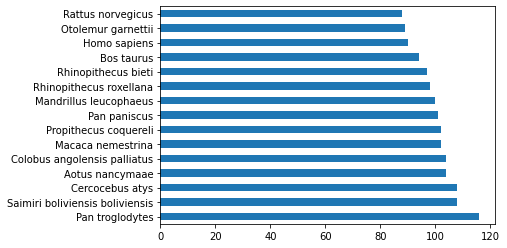

In [40]:
uniprot_organism.organism.value_counts()[:15].plot(kind= 'barh')

In [39]:
uniprot_organism.organism.value_counts()[15:].sum()

6798